In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

sns.set_style('ticks', rc={'axes.grid': True})

In [2]:
df_articles = pd.read_excel('OpArticles.xlsx')
df_ADUs = pd.read_excel('OpArticles_ADUs.xlsx')

df_articles = df_articles.merge(df_ADUs, on='article_id')
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16743 entries, 0 to 16742
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_id        16743 non-null  object
 1   title             16743 non-null  object
 2   authors           16743 non-null  object
 3   body              16743 non-null  object
 4   meta_description  16743 non-null  object
 5   topics            16743 non-null  object
 6   keywords          16743 non-null  object
 7   publish_date      16743 non-null  object
 8   url_canonical     16743 non-null  object
 9   annotator         16743 non-null  object
 10  node              16743 non-null  int64 
 11  ranges            16743 non-null  object
 12  tokens            16743 non-null  object
 13  label             16743 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.9+ MB


#### Null values

In [3]:
print(df_articles.isna().sum())

article_id          0
title               0
authors             0
body                0
meta_description    0
topics              0
keywords            0
publish_date        0
url_canonical       0
annotator           0
node                0
ranges              0
tokens              0
label               0
dtype: int64


#### Articles per annotator

,article_id
annotator,
A,3335
B,5226
C,4111
D,4071


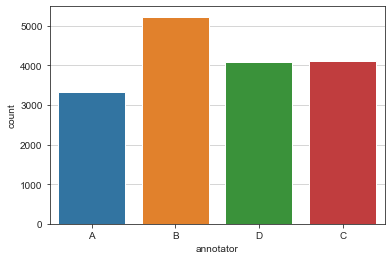

In [4]:
sns.countplot(data=df_articles, x='annotator')
df_articles.groupby(['annotator']).agg({'article_id': 'count'})

#### Distribution of Labels

Value       8102
Fact        3663
Value(-)    2900
Value(+)    1411
Policy       667
Name: label, dtype: int64

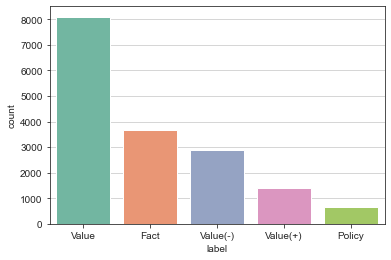

In [5]:
sns.countplot(data=df_articles, x='label', palette=sns.color_palette("Set2"))
df_articles['label'].value_counts()

Per annotator

<AxesSubplot:xlabel='label', ylabel='count'>

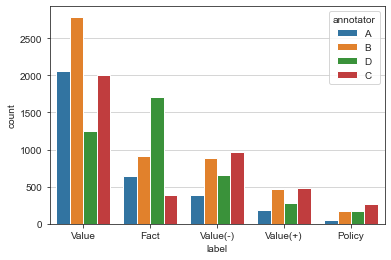

In [6]:
sns.countplot(data=df_articles, x='label', hue='annotator')

#### Distribution of Topics

Economy     2233
Sports      2169
World       2169
Sci-Tech    2123
Local       2106
Politics    2077
Culture     1934
Society     1932
Name: topics, dtype: int64

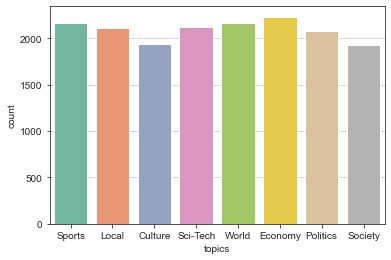

In [7]:
sns.countplot(data=df_articles, x='topics', palette=sns.color_palette("Set2"))
df_articles['topics'].value_counts()

Per annotator

<AxesSubplot:xlabel='topics', ylabel='count'>

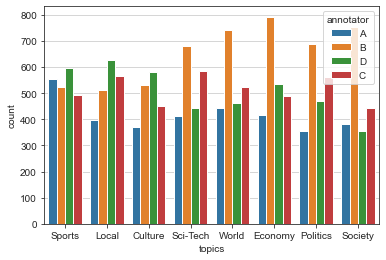

In [8]:
sns.countplot(data=df_articles, x='topics', hue='annotator')

#### Distribution of Publish Year

In [9]:
df_articles['year'] = pd.DatetimeIndex(df_articles['publish_date']).year

2019    8919
2018    4514
2016    1485
2017    1235
2015     332
2014     258
Name: year, dtype: int64

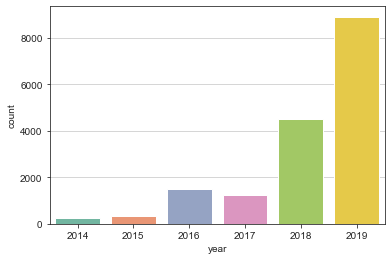

In [10]:
sns.countplot(data=df_articles, x='year', palette=sns.color_palette("Set2"))
df_articles['year'].value_counts()

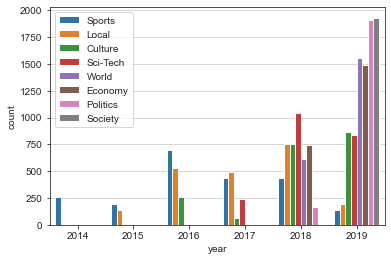

In [11]:
sns.countplot(data=df_articles, x='year', hue='topics')
plt.legend(loc='upper left')

#### WordClouds

In [12]:
def generate_wordcloud(df_column):
    text = ''

    # Iterate through the column
    for val in df_column:
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        text += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 1920, height = 1080,
                    background_color ='black',
                    stopwords = stopwords.words('portuguese'),
                    colormap='Set2',
                    min_font_size = 10).generate(text)
    
    # Plot the WordCloud image                      
    plt.figure(figsize = (16, 9), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

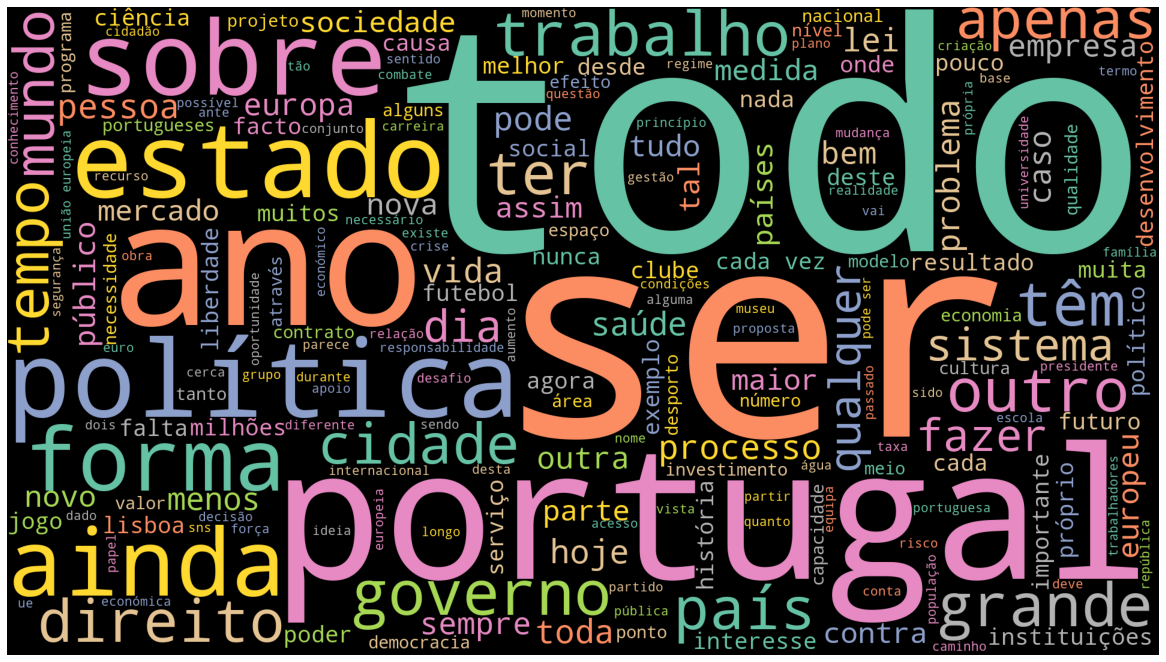

In [13]:
generate_wordcloud(df_articles['tokens'])